In [6]:
from WindPy import w
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [17]:
indicator = '000001.SH'
start_date = '1999-10-31'
end_date = '2019-02-28'

In [179]:
data = w.wsd(indicator, "close", start_date, end_date, "Period=M;Days=Alldays")

In [180]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['close'])

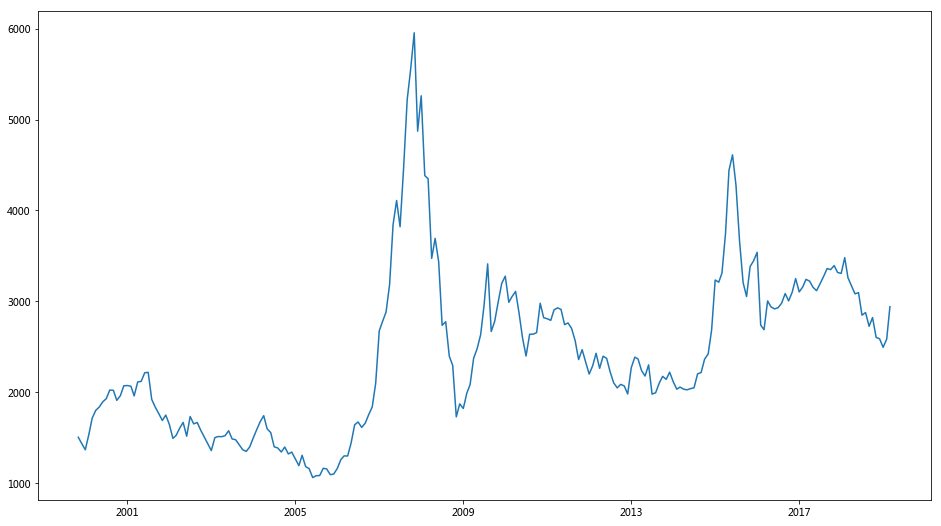

In [181]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(df['close'])

In [182]:
df['ret 3M'] = df['close'].pct_change(3)

In [183]:
ret = df['ret 3M'] * 100

In [184]:
mu = ret.mean()

In [185]:
sigma = ret.std()

Text(-40,0.04,'$\\mu=1.9$%, $\\sigma=15.4$%')

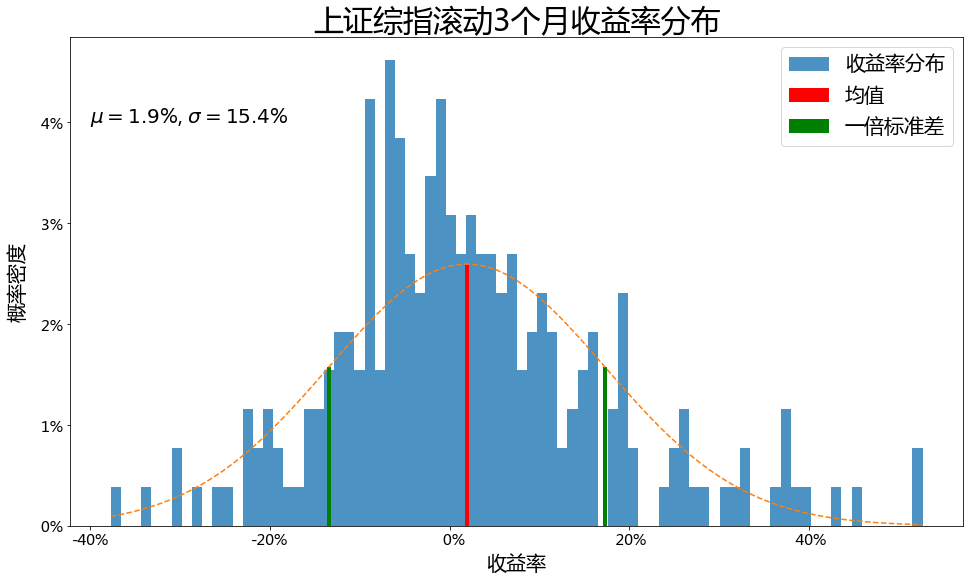

In [187]:
fig, ax = plt.subplots(figsize=(16, 9))
n, bins, patches = ax.hist(ret.dropna(), 80, normed=True, alpha=0.8, label=u'收益率分布')
ax.set_xlabel(u'收益率', fontsize=20)
ax.set_ylabel(u'概率密度', fontsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals], fontsize=15)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals], fontsize=15)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.bar(mu, y.max(), label=u'均值', color='red', width=0.5)
x = np.array([mu - sigma, mu + sigma])
y2 = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (x - mu))**2))
ax.bar(x, y2, label=u'一倍标准差', color='green', width=0.5)
_ = ax.set_title(u'上证综指滚动3个月收益率分布', fontsize=30)
ax.legend(fontsize=20)
ax.text(-40, 0.04, '$\mu=%.1f$%%, $\sigma=%.1f$%%'%(mu, sigma), fontsize=20)

In [202]:
def get_percentile(val):
    return ret[ret <= val].shape[0] * 1.0 / ret.shape[0]

In [203]:
get_percentile(-5)

0.34334763948497854

In [204]:
get_percentile(5)

0.6437768240343348

In [195]:
ret.quantile([.05, .95])

0.05   -20.854247
0.95    32.236890
Name: ret 3M, dtype: float64